In [5]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:

# Open the file with character names
with open('characters.txt', 'r', encoding='utf-8') as f:
    characters = [line.lower().strip().split(',') for line in f]

# Initialize a graph
G = nx.Graph()

# Add nodes to the graph
for character_list in characters:
    G.add_node(character_list[0])

# Open the second file
with open('count_of_monte_cristo.txt', 'r', encoding='utf-8') as f:
    # Read the entire file content
    text = f.read().lower()

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)


# For each sentence, check if any of the aliases are in the sentence
for sentence in sentences:
    # Find all characters present in the sentence
    characters_in_sentence = [character_list[0] for character_list in characters if any(alias in sentence for alias in character_list)]
    # Add edges between all pairs of characters in the sentence
    for i in range(len(characters_in_sentence)):
        for j in range(i+1, len(characters_in_sentence)):
            if characters_in_sentence[i] != characters_in_sentence[j]:  # Check if the characters are different
                if G.has_edge(characters_in_sentence[i], characters_in_sentence[j]):
                    # if the edge already exists, increment the weight
                    G[characters_in_sentence[i]][characters_in_sentence[j]]['weight'] += 1
                else:
                    # else, create the edge with weight 1
                    G.add_edge(characters_in_sentence[i], characters_in_sentence[j], weight=1)

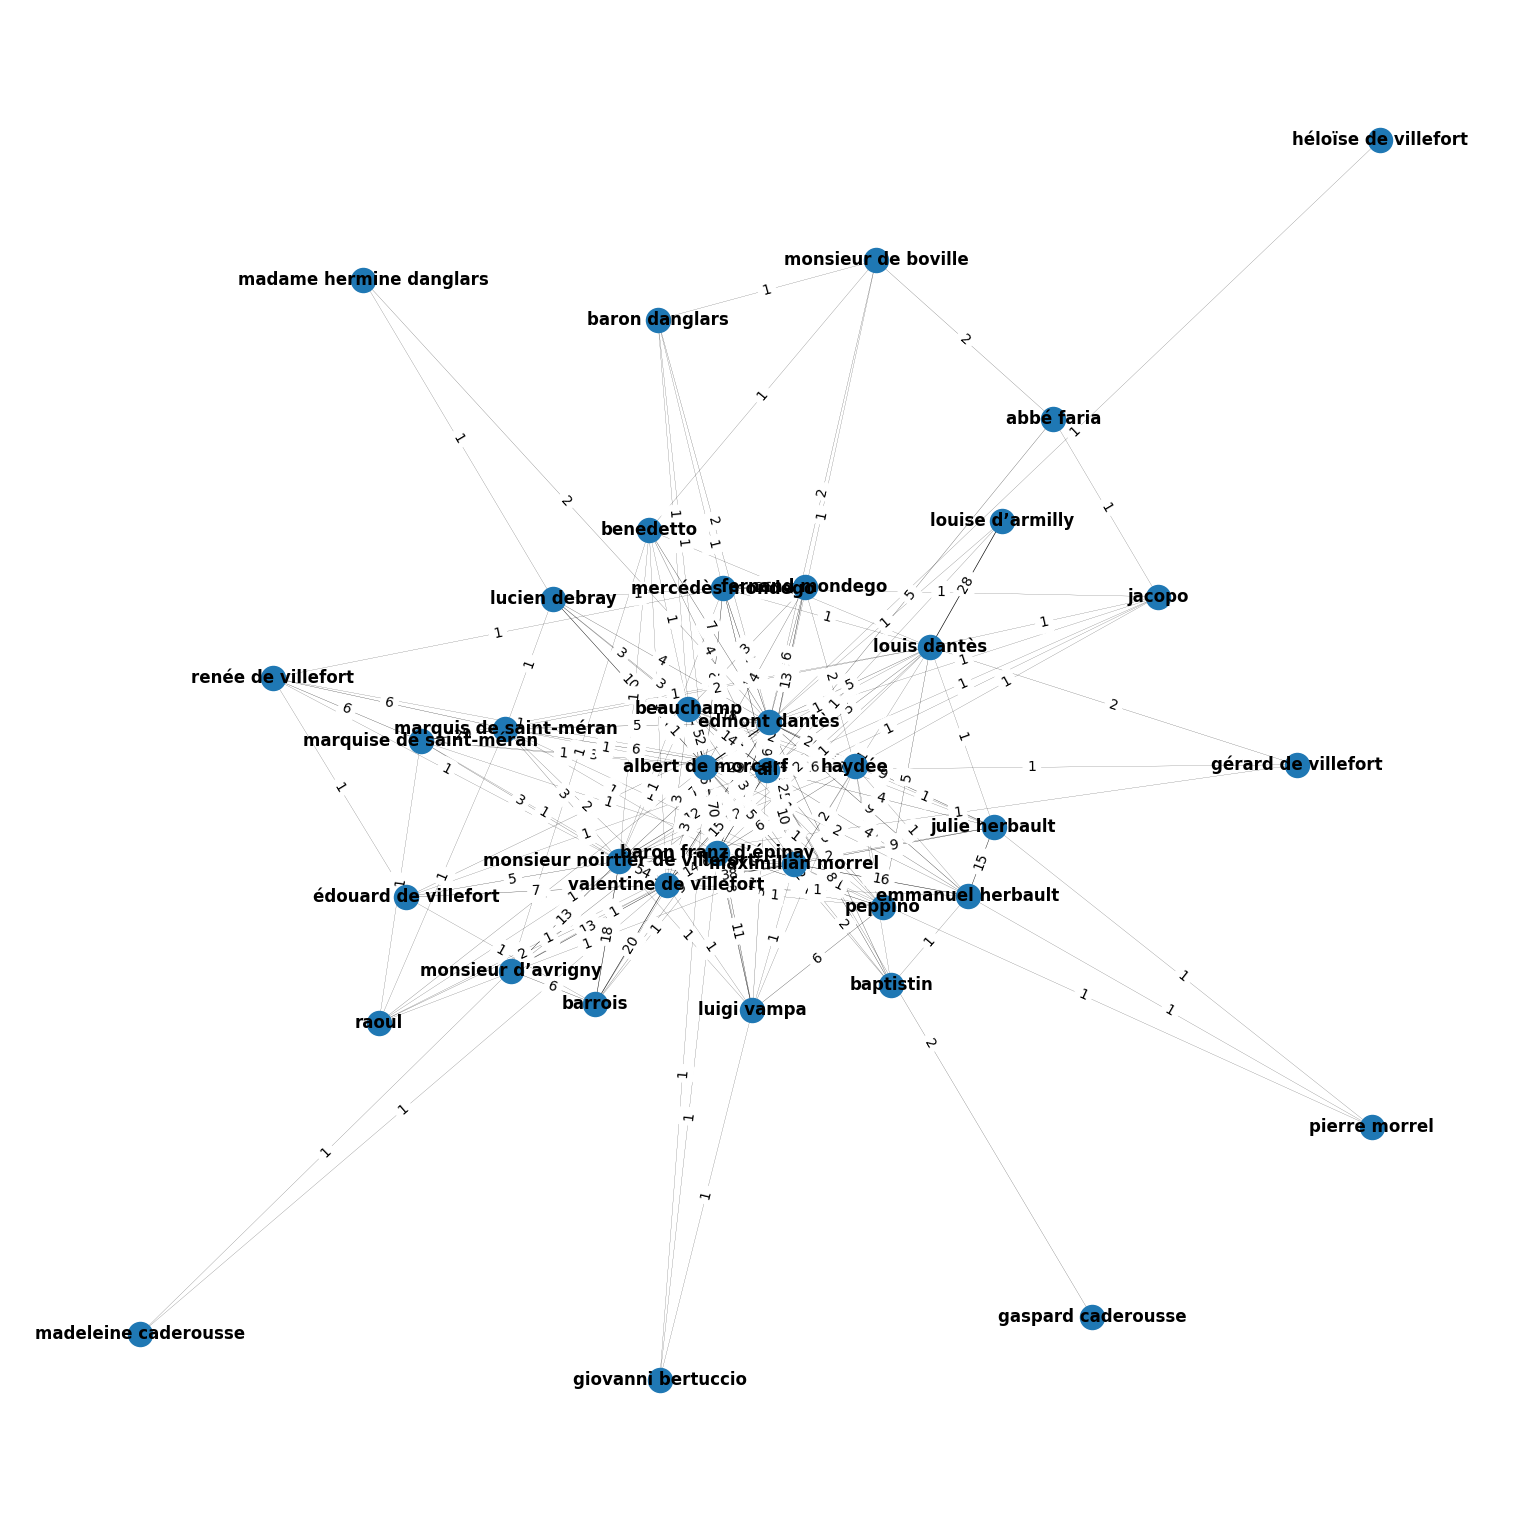

In [6]:
# Calculate the maximum weight
max_weight = max(G[u][v]['weight'] for u, v in G.edges())

# Normalize the weights to the range [0.1, 1] for visualization
edge_widths = [0.1 + 0.9 * (G[u][v]['weight'] / max_weight) for u, v in G.edges()]

# Generate the layout and draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, width=edge_widths, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

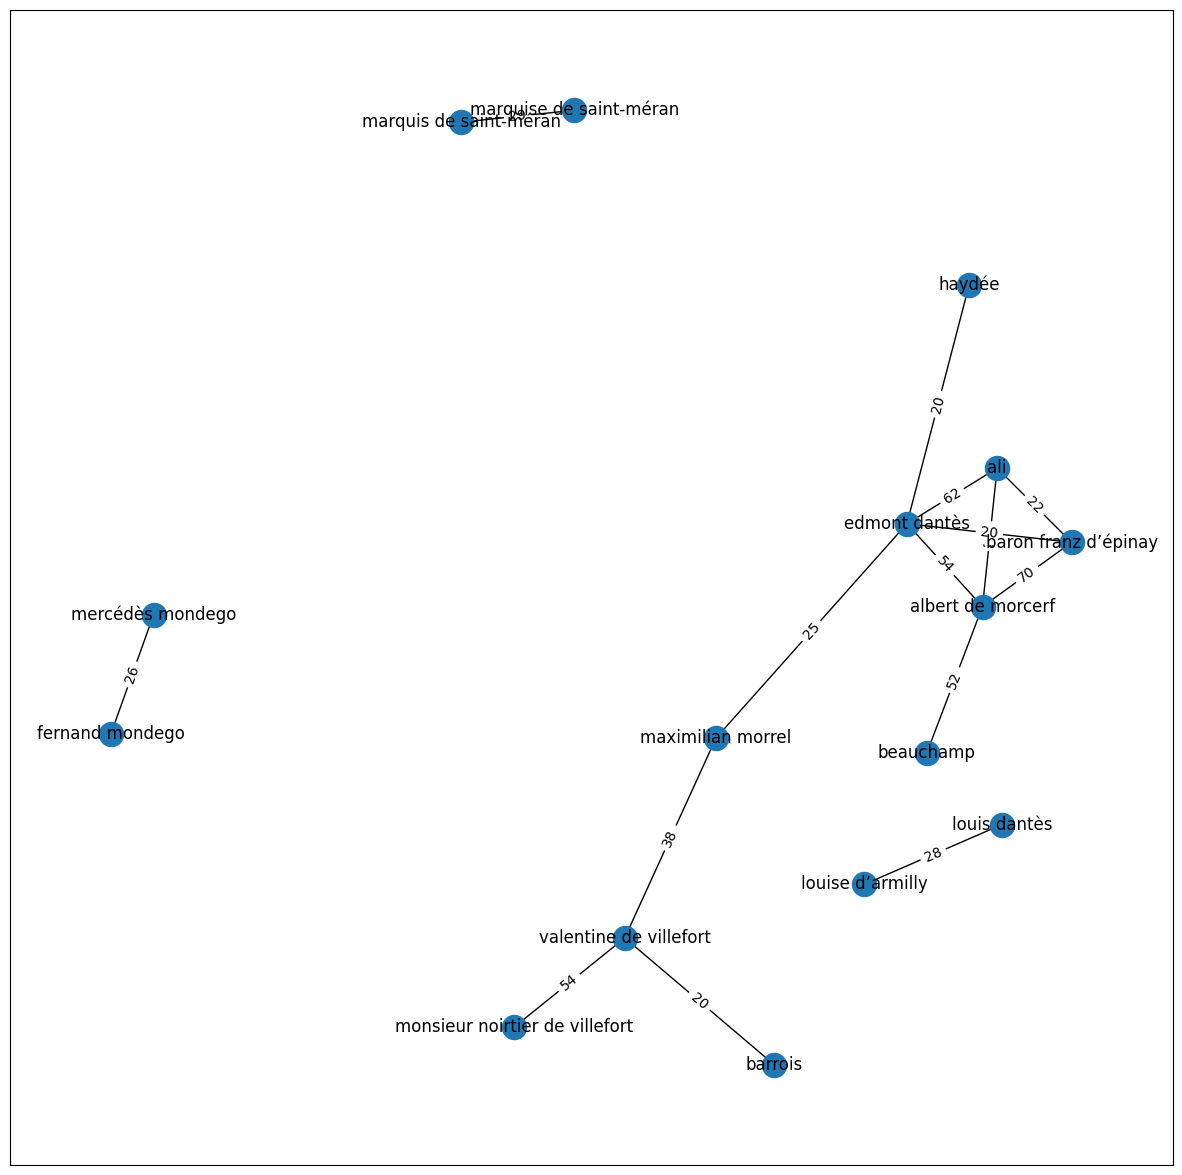

In [16]:
# Graph of edges with weights >= 20 to better visualize the strong connections of the graph

edges2 = []

for key in edge_labels.keys():
    if (edge_labels[key] >= 20):
        edges2.append(key)

G_big_edges = G.edge_subgraph(edges=edges2)

pos = nx.spring_layout(G_big_edges, k=7/np.sqrt(len(G_big_edges.nodes())))


nx.draw_networkx(G_big_edges, pos)

edge_labels2 = {(u, v): G_big_edges[u][v]['weight'] for u, v in G_big_edges.edges()}
nx.draw_networkx_edge_labels(G_big_edges, pos, edge_labels=edge_labels2)

plt.show()
